Based on Pandas 10-minute intro tutorial and the contained data structures tutorial.
1. https://pandas.pydata.org/pandas-docs/stable/10min.html
1. https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro 

Also note the book Python for Data Analysis, recommended 2nd edition published 2018

More notes:
* Info about how to handle missing values https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data
* http://data.gov.bc.ca BC Data Catalog has open source data

## starting with the DataFrame part of the Data Structures tutorial

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2-Dimensional Structures in Pandas - DataFrames

In [4]:
# unlike an ndarray in NumPy, a DataFrame in pandas can hold multiple data types
# dataframe is like a spreadsheet, each column can have its own data type
# can be made from a 1D or 2D ndarray, dictionary, list, a pandas series, or another dataframe, and some other things
# axis labels are optional and if absent, pandas creates them from "common sense rules"

# create dataframe from a series of dictionaries
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d) # create a DataFrame from dictionary d
df
# notice column one has only 3 values; the dataframe is large enough to contain the largest column

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [5]:
# can sort order using index
pd.DataFrame(d, index=['d', 'b', 'a']) # uses d, not df, as data input

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [6]:
# get the column names
df.columns

Index(['one', 'two'], dtype='object')

In [7]:
# get the index labels, aka row labels
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [8]:
# create dataFrame from ndarray
bgCan = [[ 5.6 , 7.8, 6.0 ], [ 12.2, 4.4, 6.7 ]] # same ndarray as the NumPy lesson
df = pd.DataFrame(bgCan, index=['Monday', 'Tuesday'], columns=['Breakfast', 'Lunch', 'Dinner'])
df

,Breakfast,Lunch,Dinner
Monday,5.6,7.8,6.0
Tuesday,12.2,4.4,6.7


In [9]:
# selection of data from dataFrame - just lunch

df['Lunch'] # select by column 'Lunch'

Monday     7.8
Tuesday    4.4
Name: Lunch, dtype: float64

In [10]:
df.loc['Monday'] # select by row label 'Monday'

Breakfast    5.6
Lunch        7.8
Dinner       6.0
Name: Monday, dtype: float64

In [11]:
df.iloc[1] # select row by integer location 1
# output tells you index (row) 1 is Tuesday

Breakfast    12.2
Lunch         4.4
Dinner        6.7
Name: Tuesday, dtype: float64

In [12]:
rand_bg = np.random.uniform(low=2.5, high=19, size=(21,)) # create a data sample of random numbers
rand_bg_s = pd.Series(rand_bg)
bg_s = rand_bg_s.round(1) # reduce to one decimal places to it's a little easier to read
# now the series looks like a bunch of blood sugars
bg_s # bg_s name confers 'bg' and 'Series', a nice short name that reminds you it's a Series

0     13.7
1      2.9
2     10.6
3     15.2
4     11.0
5     14.0
6      5.3
7      4.0
8      5.3
9     18.5
10    11.1
11     8.5
12     3.5
13     4.8
14     2.9
15    14.6
16    16.8
17     2.7
18    19.0
19     5.1
20    10.8
dtype: float64

In [13]:
bg_df = pd.DataFrame(bg_s) # create dataFrame
bg_df # a nice name to remind you this one is a DataFrame

,0
0,13.7
1,2.9
2,10.6
3,15.2
4,11.0
5,14.0
6,5.3
7,4.0
8,5.3
9,18.5


In [14]:
# now it would be nice if they were assigned to a few different days and the usual three meals
# aka a DataFrame with 3 columns, and 7 rows

# NumPy's ndarray can be reshaped - here's how it's done with a pandas DataFrame

arr = bg_df.values.reshape(7, 3) # reshape our 21 values into 3 columns; becomes ndarray
bg_df2 = pd.DataFrame(arr) # convert back to DataFrame
bg_df2

,0,1,2
0,13.7,2.9,10.6
1,15.2,11.0,14.0
2,5.3,4.0,5.3
3,18.5,11.1,8.5
4,3.5,4.8,2.9
5,14.6,16.8,2.7
6,19.0,5.1,10.8


In [15]:
bg_df2[2:5] # select rows with a slice, row 2 up to but not including row 5

,0,1,2
2,5.3,4.0,5.3
3,18.5,11.1,8.5
4,3.5,4.8,2.9


## import a data file

In [16]:
# import a .csv file (data from blood testers usually exported as .csv or .txt)
# bg2 = pd.read_csv('/home/hbada/BGdata/Libre2018-01-03.txt') # when using pythonanywhere.com
bg2 = pd.read_csv('Libre2018-01-03.txt') # when saved locally

print(bg2)
type(bg2) # at bottom we see it's a DataFrame

# and the data is tab delimited!

        85\t2017/12/22 00:16\t0\t12.2
0        86\t2017/12/22 00:32\t4\t1.0
1       86\t2017/12/22 00:32\t1\t13.1
2       89\t2017/12/22 00:31\t0\t11.9
3       90\t2017/12/22 00:46\t0\t10.3
4        91\t2017/12/22 01:01\t0\t9.8
5        92\t2017/12/22 01:16\t0\t8.7
6        93\t2017/12/22 01:31\t0\t7.4
7        94\t2017/12/22 01:46\t0\t5.8
8        95\t2017/12/22 02:01\t0\t4.1
9        96\t2017/12/22 02:16\t0\t3.6
10       97\t2017/12/22 02:31\t0\t3.4
11       98\t2017/12/22 02:46\t0\t3.2
12       99\t2017/12/22 03:01\t0\t3.1
13      100\t2017/12/22 03:16\t0\t3.0
14      101\t2017/12/22 03:31\t0\t2.6
15      102\t2017/12/22 03:46\t0\t2.2
16      103\t2017/12/22 04:02\t1\t2.2
17      105\t2017/12/22 04:10\t1\t2.6
18      107\t2017/12/22 04:02\t0\t2.4
19      108\t2017/12/22 04:17\t0\t2.7
20      109\t2017/12/22 04:32\t0\t3.9
21      110\t2017/12/22 04:47\t0\t6.2
22      111\t2017/12/22 05:02\t0\t7.4
23      112\t2017/12/22 05:17\t0\t8.1
24      113\t2017/12/22 05:32\t0\t8.7
25      114\

pandas.core.frame.DataFrame

In [17]:
# try again with a tab separator
# some errors occurred with missing values after the 600th row so I keep it small here, 100 rows

#bg2 = pd.read_csv('/home/hbada/BGdata/Libre2018-01-03.txt', sep='\t', nrows=100) # pythonanywhere
bg2 = pd.read_csv('Libre2018-01-03.txt', sep='\t', nrows=100) # local
print(bg2)
print(type(bg2))

     85  2017/12/22 00:16  0  12.2
0    86  2017/12/22 00:32  4   1.0
1    86  2017/12/22 00:32  1  13.1
2    89  2017/12/22 00:31  0  11.9
3    90  2017/12/22 00:46  0  10.3
4    91  2017/12/22 01:01  0   9.8
5    92  2017/12/22 01:16  0   8.7
6    93  2017/12/22 01:31  0   7.4
7    94  2017/12/22 01:46  0   5.8
8    95  2017/12/22 02:01  0   4.1
9    96  2017/12/22 02:16  0   3.6
10   97  2017/12/22 02:31  0   3.4
11   98  2017/12/22 02:46  0   3.2
12   99  2017/12/22 03:01  0   3.1
13  100  2017/12/22 03:16  0   3.0
14  101  2017/12/22 03:31  0   2.6
15  102  2017/12/22 03:46  0   2.2
16  103  2017/12/22 04:02  1   2.2
17  105  2017/12/22 04:10  1   2.6
18  107  2017/12/22 04:02  0   2.4
19  108  2017/12/22 04:17  0   2.7
20  109  2017/12/22 04:32  0   3.9
21  110  2017/12/22 04:47  0   6.2
22  111  2017/12/22 05:02  0   7.4
23  112  2017/12/22 05:17  0   8.1
24  113  2017/12/22 05:32  0   8.7
25  114  2017/12/22 05:47  0   8.8
26  115  2017/12/22 06:02  0   8.6
27  116  2017/12/22 

In [18]:
# later on the first row will be an issue; 1.0 isn't a valid number
bg3 = bg2.drop(bg2.index[0]) # drop first row
bg3

,85,2017/12/22 00:16,0,12.2
1,86,2017/12/22 00:32,1,13.1
2,89,2017/12/22 00:31,0,11.9
3,90,2017/12/22 00:46,0,10.3
4,91,2017/12/22 01:01,0,9.8
5,92,2017/12/22 01:16,0,8.7
6,93,2017/12/22 01:31,0,7.4
7,94,2017/12/22 01:46,0,5.8
8,95,2017/12/22 02:01,0,4.1
9,96,2017/12/22 02:16,0,3.6
10,97,2017/12/22 02:31,0,3.4


In [19]:
bg3.columns # find out what the column headers are

Index(['85', '2017/12/22 00:16', '0', '12.2'], dtype='object')

In [20]:
bg3.columns = (['TBD1', 'Date', 'TBD2', 'BG']) # set new column headers
bg3.columns

Index(['TBD1', 'Date', 'TBD2', 'BG'], dtype='object')

In [21]:
bg3 # let's see what current DataFrame looks like

,TBD1,Date,TBD2,BG
1,86,2017/12/22 00:32,1,13.1
2,89,2017/12/22 00:31,0,11.9
3,90,2017/12/22 00:46,0,10.3
4,91,2017/12/22 01:01,0,9.8
5,92,2017/12/22 01:16,0,8.7
6,93,2017/12/22 01:31,0,7.4
7,94,2017/12/22 01:46,0,5.8
8,95,2017/12/22 02:01,0,4.1
9,96,2017/12/22 02:16,0,3.6
10,97,2017/12/22 02:31,0,3.4


In [22]:
bg_df2 = pd.DataFrame(bg3) # create new variable explicitly for it being a DataFrame in pandas
bg_df2
# didn't have much luck removing columns
# nor renaming the headers but we take care of these problems later

,TBD1,Date,TBD2,BG
1,86,2017/12/22 00:32,1,13.1
2,89,2017/12/22 00:31,0,11.9
3,90,2017/12/22 00:46,0,10.3
4,91,2017/12/22 01:01,0,9.8
5,92,2017/12/22 01:16,0,8.7
6,93,2017/12/22 01:31,0,7.4
7,94,2017/12/22 01:46,0,5.8
8,95,2017/12/22 02:01,0,4.1
9,96,2017/12/22 02:16,0,3.6
10,97,2017/12/22 02:31,0,3.4


In [23]:
bg_df2.dtypes # list columns with data types

TBD1      int64
Date     object
TBD2      int64
BG      float64
dtype: object

In [24]:
bg_df2.index # list all the row labels

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

In [25]:
# delete the 'to be deleted' columns
# no way to do this, so create a duplicate table containing the columns we do want

df4 = bg_df2[['Date', 'BG']].copy()
df4 # whew, this way works fine

# now we have a time series with blood glucose

,Date,BG
1,2017/12/22 00:32,13.1
2,2017/12/22 00:31,11.9
3,2017/12/22 00:46,10.3
4,2017/12/22 01:01,9.8
5,2017/12/22 01:16,8.7
6,2017/12/22 01:31,7.4
7,2017/12/22 01:46,5.8
8,2017/12/22 02:01,4.1
9,2017/12/22 02:16,3.6
10,2017/12/22 02:31,3.4


In [26]:
# convert 'Date' from object to datetime data type
df4['Date'] = pd.to_datetime(df4['Date'])
df4.dtypes

Date    datetime64[ns]
BG             float64
dtype: object

In [27]:
df4 # notice date is now standard date format

,Date,BG
1,2017-12-22 00:32:00,13.1
2,2017-12-22 00:31:00,11.9
3,2017-12-22 00:46:00,10.3
4,2017-12-22 01:01:00,9.8
5,2017-12-22 01:16:00,8.7
6,2017-12-22 01:31:00,7.4
7,2017-12-22 01:46:00,5.8
8,2017-12-22 02:01:00,4.1
9,2017-12-22 02:16:00,3.6
10,2017-12-22 02:31:00,3.4


## Pandas 10-minute introduction tutorial

In [28]:
# now that we have a data file of time series data to work with, we can 
# commence with basic Pandas functionality and statistics

In [29]:
df4.head() # first 5 rows by default

,Date,BG
1,2017-12-22 00:32:00,13.1
2,2017-12-22 00:31:00,11.9
3,2017-12-22 00:46:00,10.3
4,2017-12-22 01:01:00,9.8
5,2017-12-22 01:16:00,8.7


In [30]:
df4.tail() # last 5 rows

,Date,BG
95,2017-12-22 20:02:00,7.8
96,2017-12-22 20:17:00,6.9
97,2017-12-22 20:44:00,5.9
98,2017-12-22 20:33:00,6.3
99,2017-12-22 20:48:00,5.7


In [31]:
df4.describe() # basic stats all from one method
# percentiles look right; most data should be fairly close to the value at the 50% mark

,BG
count,99.000000
mean,7.274747
std,2.586004
min,2.200000
25%,5.650000
50%,7.400000
75%,8.800000
max,13.100000


In [32]:
# sort by column BG
df4.sort_values(by='BG')

,Date,BG
16,2017-12-22 04:02:00,2.2
15,2017-12-22 03:46:00,2.2
18,2017-12-22 04:02:00,2.4
14,2017-12-22 03:31:00,2.6
17,2017-12-22 04:10:00,2.6
19,2017-12-22 04:17:00,2.7
13,2017-12-22 03:16:00,3.0
12,2017-12-22 03:01:00,3.1
11,2017-12-22 02:46:00,3.2
10,2017-12-22 02:31:00,3.4


<IPython.core.display.Javascript object>


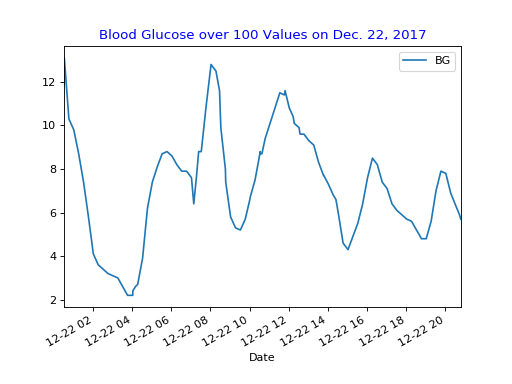

In [33]:
# plot the current data set
# magic function (%) provides extra functionality in graphs
%matplotlib nbagg 
df4.plot(x='Date', y='BG')
plt.title('Blood Glucose over 100 Values on Dec. 22, 2017',
          color='Blue')
plt.show()

# try to show x ticks for hours not date

In [34]:
# set Date column to index
df5 = df4.set_index(pd.DatetimeIndex(df4['Date']))
df5 = df5[['BG']].copy()
df5

,BG
Date,
2017-12-22 00:32:00,13.1
2017-12-22 00:31:00,11.9
2017-12-22 00:46:00,10.3
2017-12-22 01:01:00,9.8
2017-12-22 01:16:00,8.7
2017-12-22 01:31:00,7.4
2017-12-22 01:46:00,5.8
2017-12-22 02:01:00,4.1
2017-12-22 02:16:00,3.6


In [35]:
df5_lunch = df5.between_time('11:00:00', '13:00:00') # one of my favourite methods so far in pandas
df5_lunch 

,BG
Date,
2017-12-22 11:03:00,10.1
2017-12-22 11:18:00,10.8
2017-12-22 11:33:00,11.5
2017-12-22 11:49:00,11.6
2017-12-22 11:47:00,11.4
2017-12-22 12:14:00,10.4
2017-12-22 12:02:00,10.8
2017-12-22 12:17:00,10.1
2017-12-22 12:35:00,9.6


In [36]:
# at first I didn't realize this produced the lunch data I wanted, so...
# I tried to find another way to extract lunch data
# a long story follows but it worked too

df4.dtypes

Date    datetime64[ns]
BG             float64
dtype: object

In [37]:
df4 # see df4 again, since it has date NOT as index
# .date doesn't work if Date is the index, so it won't work on df5's data

,Date,BG
1,2017-12-22 00:32:00,13.1
2,2017-12-22 00:31:00,11.9
3,2017-12-22 00:46:00,10.3
4,2017-12-22 01:01:00,9.8
5,2017-12-22 01:16:00,8.7
6,2017-12-22 01:31:00,7.4
7,2017-12-22 01:46:00,5.8
8,2017-12-22 02:01:00,4.1
9,2017-12-22 02:16:00,3.6
10,2017-12-22 02:31:00,3.4


In [38]:
hours = df4['Date'].dt.hour
hours
# this method works, to extract the hour of each datetime value

1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      2
9      2
10     2
11     2
12     3
13     3
14     3
15     3
16     4
17     4
18     4
19     4
20     4
21     4
22     5
23     5
24     5
25     5
26     6
27     6
28     6
29     6
30     7
      ..
70    14
71    14
72    14
73    14
74    15
75    15
76    15
77    15
78    16
79    16
80    16
81    16
82    17
83    17
84    17
85    17
86    18
87    18
88    18
89    18
90    18
91    19
92    19
93    19
94    19
95    20
96    20
97    20
98    20
99    20
Name: Date, Length: 99, dtype: int64

In [39]:
# create new DataFrame to select a time range
df6 = df4.where( (hours > 10) & (hours < 13)) # show lunch data rows only
# remove NaN values that result in the new DataFrame
df6 = df6[df6['BG'].notnull()]
df6 # got same data as previous technique

,Date,BG
53,2017-12-22 11:03:00,10.1
54,2017-12-22 11:18:00,10.8
55,2017-12-22 11:33:00,11.5
56,2017-12-22 11:49:00,11.6
57,2017-12-22 11:47:00,11.4
58,2017-12-22 12:14:00,10.4
59,2017-12-22 12:02:00,10.8
60,2017-12-22 12:17:00,10.1
61,2017-12-22 12:35:00,9.6
62,2017-12-22 12:32:00,9.9


## now back to the pandas 10-minute tutorial 

In [40]:
df6.mean() # mean of lunch values
# better if the data set included a lot more days

BG    10.527273
dtype: float64

In [41]:
# work with bigger data set
#df7 = pd.read_csv('/home/hbada/BGdata/Libre2018-01-03.txt', sep='\t', nrows=600) # load 600 rows this time # pythonanywhere
df7 = pd.read_csv('Libre2018-01-03.txt', sep='\t', nrows=600) # load 600 rows this time # local file version

df7 = df7.drop(df7.index[0]) # drop first row
df7.columns = (['TBD1', 'Date', 'TBD2', 'BG'])
df7 = pd.DataFrame(df7) # now it looks like a data frame
df7 = df7[['Date', 'BG']].copy() # new DataFrame with unneeded columns gone
df7['Date'] = pd.to_datetime(df7['Date']) # convert Date column to datetime data type
df4.describe() # basic stats from 100 rows for comparison

,BG
count,99.000000
mean,7.274747
std,2.586004
min,2.200000
25%,5.650000
50%,7.400000
75%,8.800000
max,13.100000


In [42]:
df7.describe() # basic stats from 600 rows
# over a longer time, mean, 50%, and standard deviation went up (about 5 days of data instead of 1)
# stats could indicate something worth examining 
# example - by not including nighttime values in first data set, values were artificially good
# or maybe day 1 was just a good day by chance

,BG
count,599.000000
mean,8.707346
std,4.261198
min,2.200000
25%,5.500000
50%,8.200000
75%,11.400000
max,21.400000


<IPython.core.display.Javascript object>


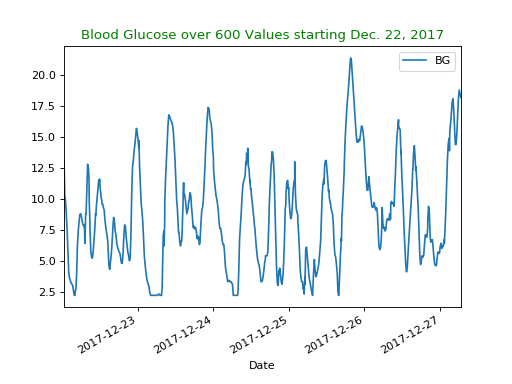

In [43]:
# plot the bigger DataFrame
df7.plot(x='Date', y='BG')
plt.title('Blood Glucose over 600 Values starting Dec. 22, 2017',
          color='Green')
plt.show()

In [44]:
# select lunch values only
df8 = df7.set_index(pd.DatetimeIndex(df7['Date']))
df8 = df8[['BG']].copy()
df8_lunch = df8.between_time('11:00:00', '13:00:00')
df8_lunch

,BG
Date,
2017-12-22 11:03:00,10.1
2017-12-22 11:18:00,10.8
2017-12-22 11:33:00,11.5
2017-12-22 11:49:00,11.6
2017-12-22 11:47:00,11.4
2017-12-22 12:14:00,10.4
2017-12-22 12:02:00,10.8
2017-12-22 12:17:00,10.1
2017-12-22 12:35:00,9.6


In [45]:
# easily count the data rows now
# note this data is continuous, every few minutes, so a count isn't really helpful but nice to know it can be done
df8_lunch.count()

BG    54
dtype: int64

In [46]:
df8_lunch.mean() # mean is a bit higher than the smaller df6 data set

BG    11.172222
dtype: float64

Note that the data recorder (blood glucose sensor) records a data point every 15 minutes
* normally a diabetic looks once at the current blood glucose, just before taking insulin and food
* still the exercise here gives an idea of comparisons and calucations that can be done
* there's probably a way to capture the data point closest to noon, to use for day-to-day comparisons

In [47]:
# finally here's an easy way to count just lunch values over 9.0, applied to DataFrame
df8_lunch[df8_lunch > 9].count()

# output shows all but 6 values are over 9 at noon plus or minus 1 hour

# if these data were not continuous, the data points would have just one value per meal
# and since some people can't afford to buy sensors on a regular basis, 
# the ability to count highs and lows at pre-meal times and pre-bedtime
# is very useful when testing meal and exercise habits

BG    48
dtype: int64